In [22]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing

%matplotlib inline
warnings.filterwarnings("ignore")

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Import GridSearch
from sklearn.model_selection import GridSearchCV

In [24]:
# pd.options.display.precision = 4

In [25]:
# pd.set_option("display.min_rows", 20)

In [26]:
data = pd.read_csv('data_nona.csv', parse_dates=['date'], index_col=['date'], dayfirst=True)

In [27]:
data.describe()

,separator_speed_perc_sp,separator_pwr_kw_pv,mill_dp_mbar_pv,total_feed_ton_h_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,fan_speed_rpm_pv,separator_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3_h_pv,...,mill_injection_water_m3_h_pv_5,mill_injection_water_m3_h_pv_6,mill_injection_water_m3_h_pv_7,mill_injection_water_m3_h_pv_8,mill_injection_water_m3_h_pv_9,bucket_elv_mtr_pwr_kw_pv_6,bucket_elv_mtr_pwr_kw_pv_7,bucket_elv_mtr_pwr_kw_pv_8,bucket_elv_mtr_pwr_kw_pv_9,bucket_elv_mtr_pwr_kw_pv_10
count,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,...,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000,68967.000000
mean,43.806228,58.164516,35.818452,82.827982,11.268959,7.944550,854.153849,765.649697,116.732376,1.996320,...,1.998700,1.999010,1.999312,1.999582,1.999765,4.876998,4.876670,4.876393,4.876136,4.875875
std,1.736863,1.244071,2.415108,11.498350,14.590743,13.184448,110.835830,29.603214,4.213995,0.659479,...,0.657927,0.657755,0.657613,0.657544,0.657549,0.134678,0.134338,0.134031,0.133788,0.133512
min,39.000000,54.930000,25.220000,61.980000,0.000000,0.000000,76.000000,528.710000,90.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.410000,4.410000,4.410000,4.410000,4.410000
25%,42.500000,57.290000,34.110000,71.335000,0.015000,0.080000,805.482500,742.915000,116.000000,1.500000,...,1.500000,1.500000,1.500000,1.500000,1.500000,4.785000,4.785000,4.785000,4.785000,4.785000
50%,43.910000,57.975000,35.810000,87.160000,0.030000,0.105000,843.710000,766.705000,118.000000,1.985000,...,1.990000,1.990000,1.990000,1.990000,1.990000,4.880000,4.880000,4.880000,4.880000,4.875000
75%,45.000000,58.885000,37.510000,91.810000,29.435000,28.270000,940.100000,786.770000,119.500000,2.680000,...,2.680000,2.680000,2.680000,2.675000,2.675000,4.970000,4.970000,4.970000,4.965000,4.965000
max,48.300000,64.180000,49.770000,104.810000,36.740000,32.680000,1190.000000,845.000000,125.500000,2.885000,...,2.885000,2.885000,2.885000,2.885000,2.885000,5.875000,5.860000,5.860000,5.835000,5.750000


In [28]:
# features = ['separator_pwr_kw_pv_1',
#             'separator_pwr_kw_pv_2',
#             'separator_pwr_kw_pv_3',
#             'separator_pwr_kw_pv_4',
#             'separator_pwr_kw_pv_5',
#             'separator_speed_perc_sp_2',
#             'separator_speed_perc_sp_3',
#             'separator_speed_perc_sp_4',
#             'separator_speed_perc_sp_5',
#             'separator_speed_perc_sp_6',
#             'separator_speed_perc_sp_7',
#             'mill_dp_mbar_pv_7',
#             'mill_dp_mbar_pv_8',
#             'mill_dp_mbar_pv_9',
#             'mill_dp_mbar_pv_10',
#             'mill_dp_mbar_pv_11',
#             'mill_dp_mbar_pv_12']
# X = data[:'2019-09-30 23:59:59'][features]
# y = data[:'2019-09-30 23:59:59']['separator_pwr_kw_pv']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [29]:
# #  Split to train and test sets
train_data = data.loc[:'2019-09-30 23:59:59']
test_data = data.loc['2019-10-01 00:00:00':]

In [30]:
# from sklearn.utils import shuffle
# train_data = shuffle(train_data, random_state=0)
# test_data = shuffle(test_data, random_state=2)

In [31]:
# # Create X train and y train
# features = ['separator_speed_perc_sp_7',
#             'separator_speed_perc_sp_6',
#             'separator_speed_perc_sp_5',
#             'separator_speed_perc_sp_4',
#             'separator_speed_perc_sp_3',
#             'separator_speed_perc_sp_2',
#             'mill_dp_mbar_pv_12',
#             'mill_dp_mbar_pv_11',
#             'mill_dp_mbar_pv_10',
#             'mill_dp_mbar_pv_9',
#             'mill_dp_mbar_pv_8',
#             'mill_dp_mbar_pv_7',
#             'separator_pwr_kw_pv_5',
#             'separator_pwr_kw_pv_4',
#             'separator_pwr_kw_pv_3',
#             'separator_pwr_kw_pv_2',
#             'separator_pwr_kw_pv_1']
# # X = home_data[features]
# X_train = train_data[features]
# y_train = train_data['separator_pwr_kw_pv']

In [32]:
# Create X train and y train
features = ['separator_pwr_kw_pv_1',
            'separator_pwr_kw_pv_2',
            'separator_pwr_kw_pv_3',
            'separator_pwr_kw_pv_4',
            'separator_pwr_kw_pv_5',
            'separator_speed_perc_sp_2',
            'separator_speed_perc_sp_3',
            'separator_speed_perc_sp_4',
            'separator_speed_perc_sp_5',
            'separator_speed_perc_sp_6',
            'separator_speed_perc_sp_7',
            'mill_dp_mbar_pv_7',
            'mill_dp_mbar_pv_8',
            'mill_dp_mbar_pv_9',
            'mill_dp_mbar_pv_10',
            'mill_dp_mbar_pv_11',
            'mill_dp_mbar_pv_12']
# X = home_data[features]
X_train = train_data[features]
y_train = train_data['separator_pwr_kw_pv']

In [33]:
# Create X test and y test
X_test = test_data[features]
X_test = X_test
y_test = test_data['separator_pwr_kw_pv']

In [34]:
X_test

,separator_pwr_kw_pv_1,separator_pwr_kw_pv_2,separator_pwr_kw_pv_3,separator_pwr_kw_pv_4,separator_pwr_kw_pv_5,separator_speed_perc_sp_2,separator_speed_perc_sp_3,separator_speed_perc_sp_4,separator_speed_perc_sp_5,separator_speed_perc_sp_6,separator_speed_perc_sp_7,mill_dp_mbar_pv_7,mill_dp_mbar_pv_8,mill_dp_mbar_pv_9,mill_dp_mbar_pv_10,mill_dp_mbar_pv_11,mill_dp_mbar_pv_12
date,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,57.250,57.190,56.880,57.035,57.135,42.2,42.2,42.18,42.18,42.18,42.18,35.600,35.755,35.275,35.090,35.280,35.580
2019-10-01 00:01:00,57.020,57.250,57.190,56.880,57.035,42.2,42.2,42.20,42.18,42.18,42.18,35.630,35.600,35.755,35.275,35.090,35.280
2019-10-01 00:02:00,56.575,57.020,57.250,57.190,56.880,42.2,42.2,42.20,42.20,42.18,42.18,35.510,35.630,35.600,35.755,35.275,35.090
2019-10-01 00:03:00,57.035,56.575,57.020,57.250,57.190,42.2,42.2,42.20,42.20,42.20,42.18,35.485,35.510,35.630,35.600,35.755,35.275
2019-10-01 00:04:00,56.695,57.035,56.575,57.020,57.250,42.2,42.2,42.20,42.20,42.20,42.20,35.140,35.485,35.510,35.630,35.600,35.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:50:00,58.135,58.345,58.350,58.125,58.525,45.5,45.5,45.50,45.50,45.50,45.50,34.700,34.525,35.195,34.335,35.040,35.895
2019-10-31 23:51:00,58.370,58.135,58.345,58.350,58.125,45.5,45.5,45.50,45.50,45.50,45.50,35.420,34.700,34.525,35.195,34.335,35.040
2019-10-31 23:52:00,58.410,58.370,58.135,58.345,58.350,45.5,45.5,45.50,45.50,45.50,45.50,36.640,35.420,34.700,34.525,35.195,34.335


In [35]:
# # Scale the sets in needed
# sc = MinMaxScaler()

# # sc.fit(X_tr)
# # X_tr_sc = sc.transform(X_tr)
# # X_ts_sc = sc.transform(X_ts)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [36]:
X_train

,separator_pwr_kw_pv_1,separator_pwr_kw_pv_2,separator_pwr_kw_pv_3,separator_pwr_kw_pv_4,separator_pwr_kw_pv_5,separator_speed_perc_sp_2,separator_speed_perc_sp_3,separator_speed_perc_sp_4,separator_speed_perc_sp_5,separator_speed_perc_sp_6,separator_speed_perc_sp_7,mill_dp_mbar_pv_7,mill_dp_mbar_pv_8,mill_dp_mbar_pv_9,mill_dp_mbar_pv_10,mill_dp_mbar_pv_11,mill_dp_mbar_pv_12
date,,,,,,,,,,,,,,,,,
2019-05-11 03:15:00,56.765,56.330,56.920,56.465,56.450,42.70,42.70,42.70,42.70,42.70,42.70,33.130,33.650,33.065,33.070,33.160,33.220
2019-05-11 09:01:00,56.260,55.975,56.255,56.715,56.630,42.70,42.70,42.70,42.70,42.70,42.70,32.235,32.315,32.270,32.510,32.735,31.350
2019-05-11 09:02:00,56.550,56.260,55.975,56.255,56.715,42.70,42.70,42.70,42.70,42.70,42.70,32.355,32.235,32.315,32.270,32.510,32.735
2019-05-11 09:03:00,56.530,56.550,56.260,55.975,56.255,42.70,42.70,42.70,42.70,42.70,42.70,32.815,32.355,32.235,32.315,32.270,32.510
2019-05-11 09:04:00,56.240,56.530,56.550,56.260,55.975,42.70,42.70,42.70,42.70,42.70,42.70,32.455,32.815,32.355,32.235,32.315,32.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:55:00,56.870,57.030,57.090,56.870,56.920,42.18,42.20,42.24,42.24,42.28,42.26,35.580,35.650,35.480,35.500,34.780,35.095
2019-09-30 23:56:00,57.135,56.870,57.030,57.090,56.870,42.18,42.18,42.20,42.24,42.24,42.28,35.280,35.580,35.650,35.480,35.500,34.780
2019-09-30 23:57:00,57.035,57.135,56.870,57.030,57.090,42.18,42.18,42.18,42.20,42.24,42.24,35.090,35.280,35.580,35.650,35.480,35.500


In [37]:
X_test

,separator_pwr_kw_pv_1,separator_pwr_kw_pv_2,separator_pwr_kw_pv_3,separator_pwr_kw_pv_4,separator_pwr_kw_pv_5,separator_speed_perc_sp_2,separator_speed_perc_sp_3,separator_speed_perc_sp_4,separator_speed_perc_sp_5,separator_speed_perc_sp_6,separator_speed_perc_sp_7,mill_dp_mbar_pv_7,mill_dp_mbar_pv_8,mill_dp_mbar_pv_9,mill_dp_mbar_pv_10,mill_dp_mbar_pv_11,mill_dp_mbar_pv_12
date,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,57.250,57.190,56.880,57.035,57.135,42.2,42.2,42.18,42.18,42.18,42.18,35.600,35.755,35.275,35.090,35.280,35.580
2019-10-01 00:01:00,57.020,57.250,57.190,56.880,57.035,42.2,42.2,42.20,42.18,42.18,42.18,35.630,35.600,35.755,35.275,35.090,35.280
2019-10-01 00:02:00,56.575,57.020,57.250,57.190,56.880,42.2,42.2,42.20,42.20,42.18,42.18,35.510,35.630,35.600,35.755,35.275,35.090
2019-10-01 00:03:00,57.035,56.575,57.020,57.250,57.190,42.2,42.2,42.20,42.20,42.20,42.18,35.485,35.510,35.630,35.600,35.755,35.275
2019-10-01 00:04:00,56.695,57.035,56.575,57.020,57.250,42.2,42.2,42.20,42.20,42.20,42.20,35.140,35.485,35.510,35.630,35.600,35.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:50:00,58.135,58.345,58.350,58.125,58.525,45.5,45.5,45.50,45.50,45.50,45.50,34.700,34.525,35.195,34.335,35.040,35.895
2019-10-31 23:51:00,58.370,58.135,58.345,58.350,58.125,45.5,45.5,45.50,45.50,45.50,45.50,35.420,34.700,34.525,35.195,34.335,35.040
2019-10-31 23:52:00,58.410,58.370,58.135,58.345,58.350,45.5,45.5,45.50,45.50,45.50,45.50,36.640,35.420,34.700,34.525,35.195,34.335


# Correlation Matrix

In [38]:
# # GETTING Correllation matrix
# corr_mat = data.corr()
# sns.heatmap(corr_mat,vmax=1,square=True,annot=True)

## Linear Regression

In [39]:
# Import Model
from sklearn.linear_model import LinearRegression

In [40]:
X_test.columns

Index(['separator_pwr_kw_pv_1', 'separator_pwr_kw_pv_2',
       'separator_pwr_kw_pv_3', 'separator_pwr_kw_pv_4',
       'separator_pwr_kw_pv_5', 'separator_speed_perc_sp_2',
       'separator_speed_perc_sp_3', 'separator_speed_perc_sp_4',
       'separator_speed_perc_sp_5', 'separator_speed_perc_sp_6',
       'separator_speed_perc_sp_7', 'mill_dp_mbar_pv_7', 'mill_dp_mbar_pv_8',
       'mill_dp_mbar_pv_9', 'mill_dp_mbar_pv_10', 'mill_dp_mbar_pv_11',
       'mill_dp_mbar_pv_12'],
      dtype='object')

In [41]:
# # # Define Model, Fit Predict
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)    
lr_preds = lin_reg.predict(X_test)
lr_preds_train = lin_reg.predict(X_train)

# Mean Absolute Error and Mean Squared Error
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)

lr_mae_train = mean_absolute_error(y_train, lr_preds_train)
lr_mse_train = mean_squared_error(y_train, lr_preds_train)

print('Linear Regression: ', lr_mae, lr_mse)
print('Linear Regression: ', lr_mae_train, lr_mse_train)

Linear Regression:  0.24580271579457727 0.10425478256649759
Linear Regression:  0.24500320490543115 0.11259799772380498


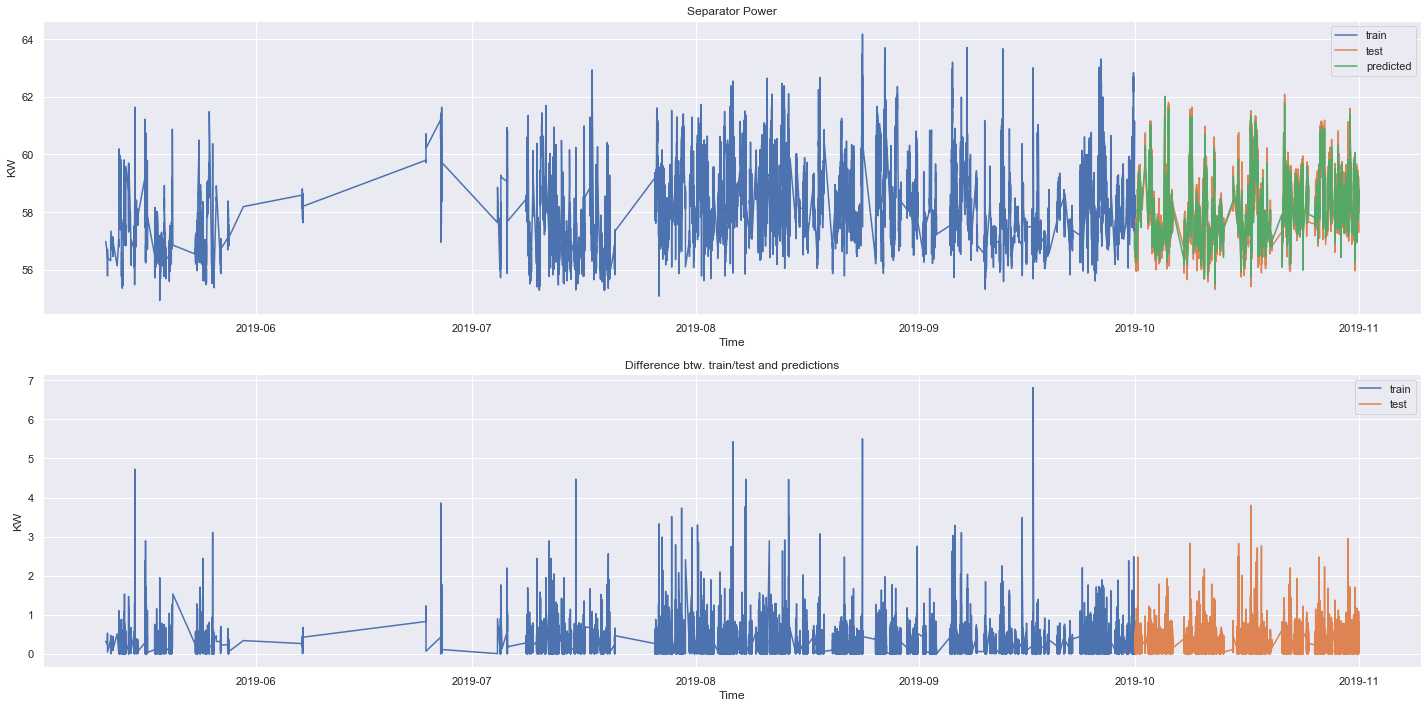

In [42]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index[:], lr_preds, label='predicted')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()


ax2 = plt.subplot(212)
ax2.plot(np.abs(lr_preds_train - y_train), label='train')
ax2.plot(np.abs(lr_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predictions')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

## Lasso

In [43]:
# Define Model with Grid, Fit Predict
from sklearn.linear_model import Lasso

param_grid = {'alpha': [1e-05, 1e-04, 1e-03]}
las_reg = GridSearchCV(Lasso(), param_grid, cv=5)
las_reg.fit(X_train, y_train)
ls_preds = las_reg.predict(X_test)

ls_preds_train = las_reg.predict(X_train)

# Mean Absolute Error and Mean Squared Error
ls_mae = mean_absolute_error(y_test, ls_preds)
ls_mse = mean_squared_error(y_test, ls_preds)

ls_mae_train = mean_absolute_error(y_train, ls_preds_train)
ls_mse_train = mean_squared_error(y_train, ls_preds_train)

In [44]:
las_reg.best_params_ 

{'alpha': 0.0001}

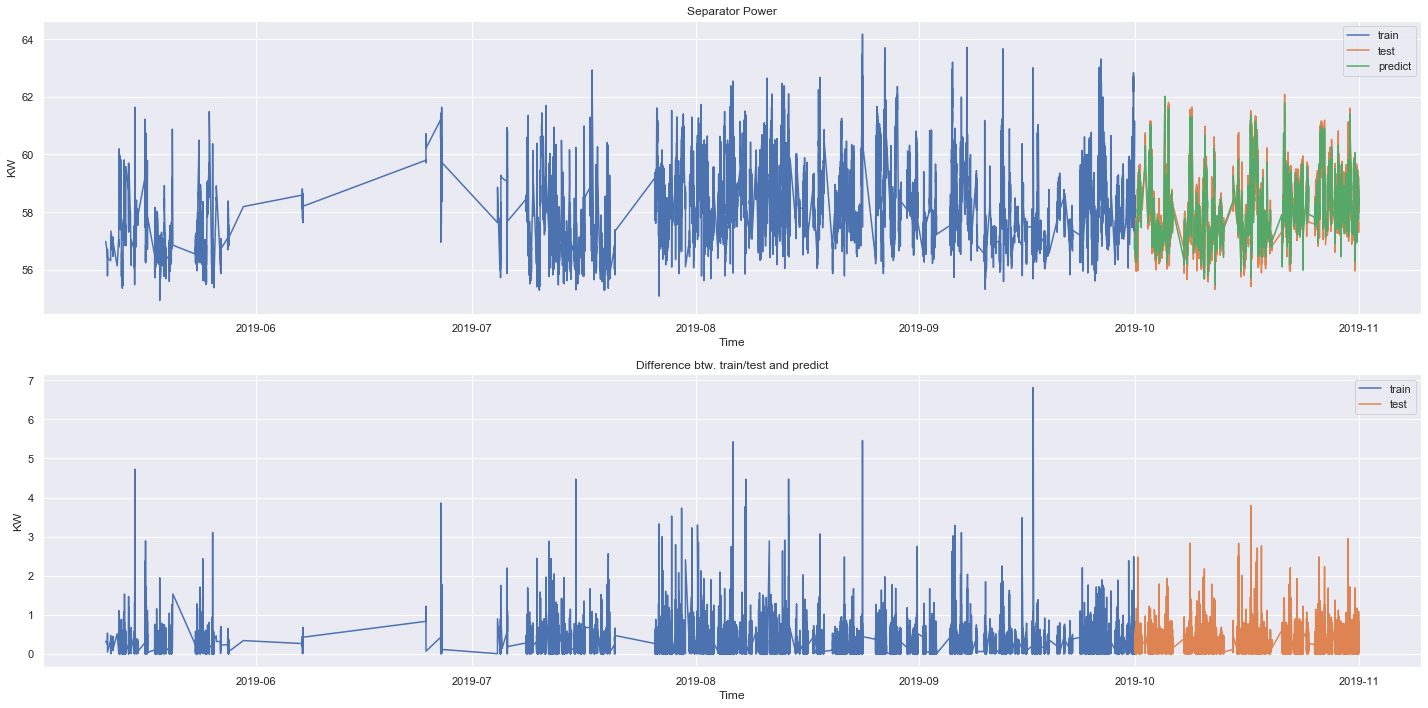

In [45]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index, ls_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(ls_preds_train - y_train), label='train')
ax2.plot(np.abs(ls_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

## Ridge

In [46]:
# Define Model with Grid, Fit Predict
from sklearn.linear_model import Ridge

rid_reg = GridSearchCV(Ridge(), param_grid, cv=5)
rid_reg.fit(X_train, y_train)
rd_preds = rid_reg.predict(X_test)

rd_preds_train = rid_reg.predict(X_train)

# Mean Absolute Error and Mean Squared Error
rd_mae = mean_absolute_error(y_test, rd_preds)
rd_mse = mean_squared_error(y_test, rd_preds)

rd_mae_train = mean_absolute_error(y_train, rd_preds_train)
rd_mse_train = mean_squared_error(y_train, rd_preds_train)

print('Linear Regression: ', lr_mae, lr_mse)
print('Lasso: ', ls_mae, ls_mse)
print('Ridge: ', rd_mae, rd_mse)
print('------------------TRAIN-----------------------')
print('Linear Regression: ', lr_mae_train, lr_mse_train)
print('Lasso: ', ls_mae_train, ls_mse_train)
print('Ridge: ', rd_mae_train, rd_mse_train)

Linear Regression:  0.24580271579457727 0.10425478256649759
Lasso:  0.24584759146166463 0.10428354750908765
Ridge:  0.2458027154015147 0.10425478251923428
------------------TRAIN-----------------------
Linear Regression:  0.24500320490543115 0.11259799772380498
Lasso:  0.2450200363592252 0.11260233871597462
Ridge:  0.2450032045747667 0.11259799772380562


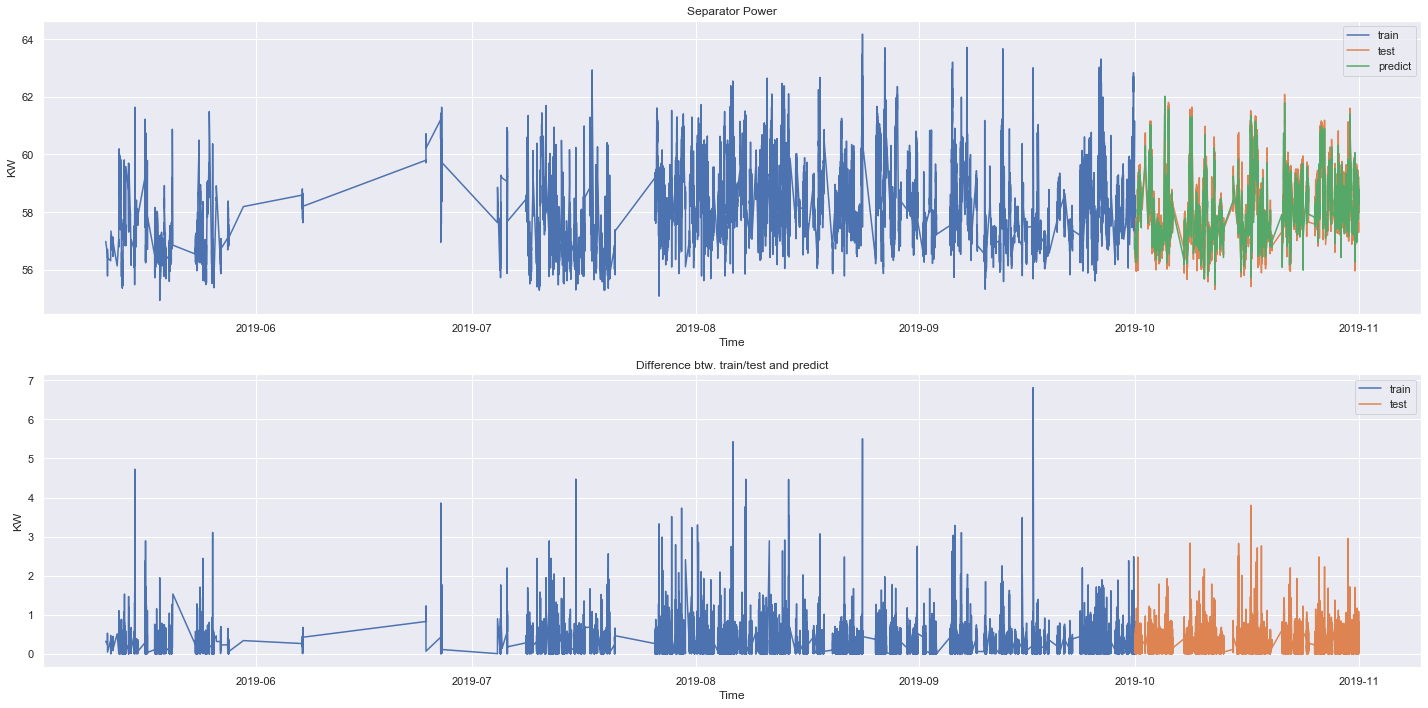

In [47]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index, rd_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(rd_preds_train - y_train), label='train')
ax2.plot(np.abs(rd_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

In [48]:
las_reg.best_params_

{'alpha': 0.0001}

In [49]:
las_reg.best_estimator_.coef_

array([ 0.41359804,  0.24265693,  0.12742869,  0.09515019,  0.09419801,
        0.13932003, -0.0287092 , -0.03019473, -0.04690147,  0.00136745,
       -0.02097211, -0.00108231,  0.00076669, -0.        ,  0.00085699,
       -0.        ,  0.0010152 ])

## Tree Regression

In [50]:
# # Import Model
# from sklearn.tree import DecisionTreeRegressor

# # Define Model with Grid, Fit Predict
# tree_grid = {'criterion': ['mse', 'mae'],
#              'max_depth': [None]}
# dt = GridSearchCV(DecisionTreeRegressor(),tree_grid, cv=2) # Cross-validation 5 fores
# dt.fit(X_train, y_train)
# dt_preds = dt.predict(X_test)

# dt_preds_train = dt.predict(X_train)

# # Mean Absolute Error and Mean Squared Error
# dt_mae = mean_absolute_error(y_test, dt_preds)
# dt_mse = mean_squared_error(y_test, dt_preds)

# dt_mae_train = mean_absolute_error(y_train, dt_preds_train)
# dt_mse_train = mean_squared_error(y_train, dt_preds_train)

# print('Decision Tree Regression: ', dt_mae, dt_mse)
# print('Decision Tree Regression: ', dt_mae_train, dt_mse_train)

In [51]:
# # Plot
# sns.set(rc={'figure.figsize':(20, 10)})
# fig = plt.figure(figsize = (20,10))
# ax = plt.subplot(211)
# ax.plot(train_data['separator_pwr_kw_pv'], label='train')
# ax.plot(test_data['separator_pwr_kw_pv'], label='test')
# ax.plot(test_data.index, dt_preds, label='predict')
# ax.set_title('Separator Power')
# ax.set_xlabel('Time')
# ax.set_ylabel('KW')
# ax.legend()

# ax2 = plt.subplot(212)
# ax2.plot(np.abs(dt_preds_train - y_train), label='train')
# ax2.plot(np.abs(dt_preds - y_test), label='test')
# ax2.set_title('Difference btw. train/test and predict')
# ax2.set_xlabel('Time')
# ax2.set_ylabel('KW')
# ax2.legend()

# plt.tight_layout()

## Random Forest

In [52]:
# # Import Model
# from sklearn.ensemble import RandomForestRegressor

# # Define Model with Grid, Fit Predict
# rf_grid = {'n_estimators': [5],
#            'criterion': ['mse', 'mae'],
#            'verbose': [1],
#            'n_jobs': [-1]}
# rf_model = GridSearchCV(RandomForestRegressor(), rf_grid, cv=2)
# rf_model.fit(X_train, y_train)
# rf_preds = rf_model.predict(X_test)

# rf_preds_train = rf_model.predict(X_train)

# # Mean Absolute Error and Mean Squared Error
# rf_mae = mean_absolute_error(rf_preds, y_test)
# rf_mse = mean_squared_error(rf_preds, y_test)

# rf_mae_train = mean_absolute_error(rf_preds_train, y_train)
# rf_mse_train = mean_squared_error(rf_preds_train, y_train)

# print('Random Forest: ', rf_mae, rf_mse)
# print('Random Forest: ', rf_mae_train, rf_mse_train)

In [53]:
# # Plot
# sns.set(rc={'figure.figsize':(20, 10)})
# fig = plt.figure(figsize = (20,10))
# ax = plt.subplot(211)
# ax.plot(train_data['separator_pwr_kw_pv'], label='train')
# ax.plot(test_data['separator_pwr_kw_pv'], label='test')
# ax.plot(test_data.index, rf_preds, label='predict')
# ax.set_title('Separator Power')
# ax.set_xlabel('Time')
# ax.set_ylabel('KW')
# ax.legend()

# ax2 = plt.subplot(212)
# ax2.plot(np.abs(rf_preds_train - y_train), label='train')
# ax2.plot(np.abs(rf_preds - y_test), label='test')
# ax2.set_title('Difference btw. train/test and predict')
# ax2.set_xlabel('Time')
# ax2.set_ylabel('KW')
# ax2.legend()

# plt.tight_layout()

# KNN Regression

In [54]:
# Import Model
from sklearn.neighbors import KNeighborsRegressor

# Define Model with Grid
knn_grid = {'n_neighbors': [18,19,20,21,22],
            'weights': ['distance'],
            'n_jobs': [-1]}
knn_model = GridSearchCV(KNeighborsRegressor(), knn_grid, cv=5, n_jobs=-1)
knn_model.fit(X_train,y_train)
knn_preds = knn_model.predict(X_test)

knn_preds_train = knn_model.predict(X_train)

# Mean Absolute Error and Mean Squared Error
knn_mae = mean_absolute_error(knn_preds, y_test)
knn_mse = mean_squared_error(knn_preds, y_test)
print('KNN: ', knn_mae, knn_mse)

knn_mae_train = mean_absolute_error(knn_preds_train, y_train)
knn_mse_train = mean_squared_error(knn_preds_train, y_train)
print('KNN: ', knn_mae_train, knn_mse_train)

KNN:  0.2849385841050036 0.14077497186005547
KNN:  0.0 0.0


In [55]:
knn_model.best_params_

{'n_jobs': -1, 'n_neighbors': 21, 'weights': 'distance'}

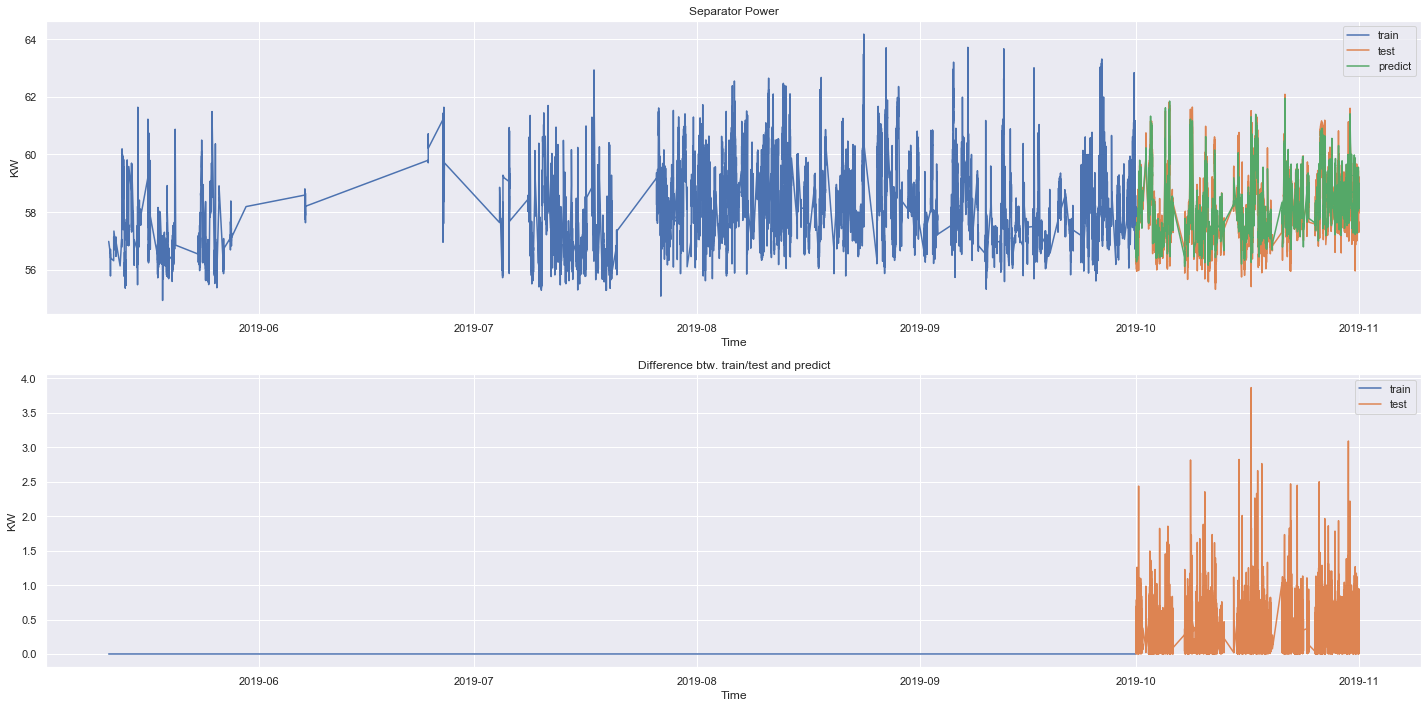

In [56]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index, knn_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(knn_preds_train - y_train), label='train')
ax2.plot(np.abs(knn_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

# Bayesian Ridge Regression

In [57]:
# Import Model
from sklearn.linear_model import BayesianRidge

# Define Model with Grid
brd_grid = {'alpha_1': [1e-06],
            'alpha_2': [1e-06],
            'n_iter': [300]}
brd_model = GridSearchCV(BayesianRidge(), brd_grid, cv=2)
brd_model.fit(X_train,y_train)
brd_preds = brd_model.predict(X_test)

brd_preds_train = brd_model.predict(X_train)

# Mean Absolute Error and Mean Squared Error
brd_mae = mean_absolute_error(brd_preds, y_test)
brd_mse = mean_squared_error(brd_preds, y_test)
print('Bayesian Ridge: ', brd_mae, brd_mse)

brd_mae_train = mean_absolute_error(brd_preds_train, y_train)
brd_mse_train = mean_squared_error(brd_preds_train, y_train)
print('Bayesian Ridge: ', brd_mae_train, brd_mse_train)

Bayesian Ridge:  0.24580013103773102 0.10425447840225217
Bayesian Ridge:  0.2450010573185747 0.11259802569493563


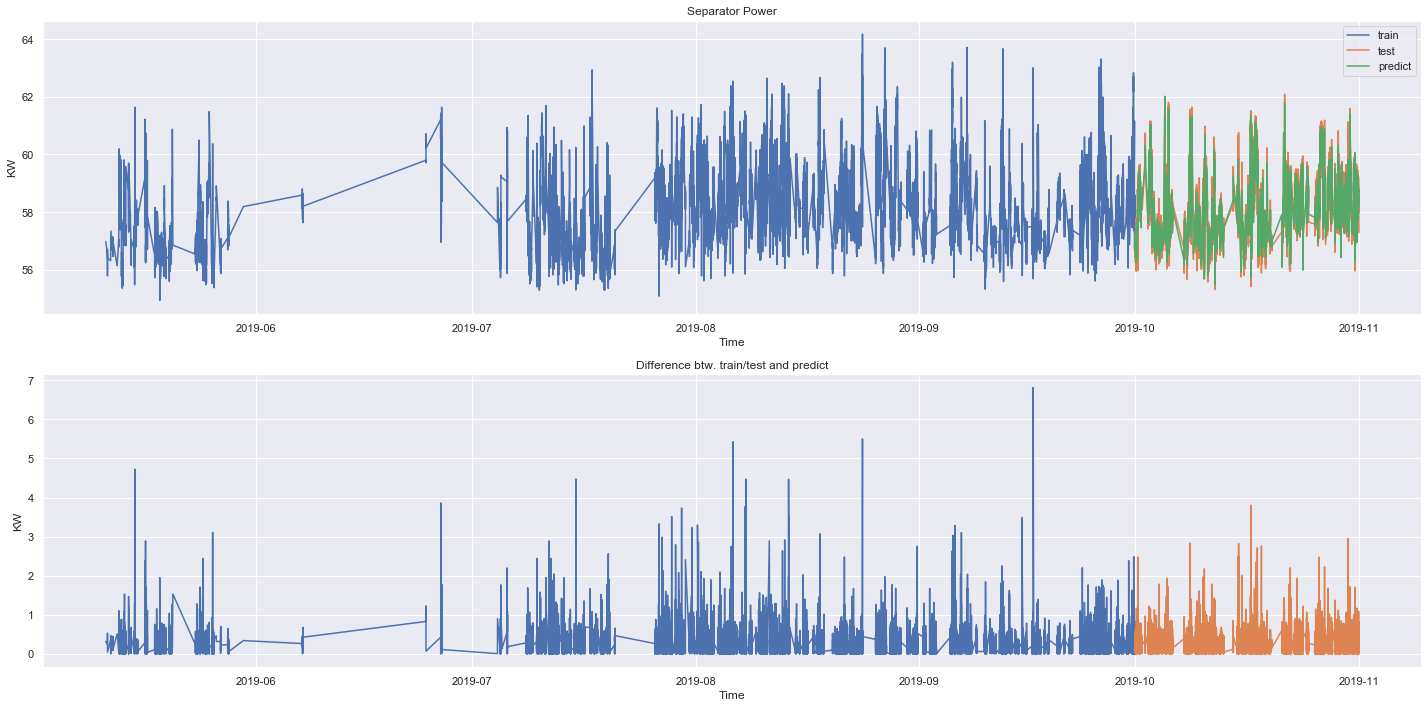

In [58]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index, brd_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(brd_preds_train - y_train), label='train')
ax2.plot(np.abs(brd_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')

plt.tight_layout()

# Polynomial

In [59]:
# Import Model
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define Model with Pipeline
poly_model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(X_train,y_train)
poly_preds = poly_model.predict(X_test)

poly_preds_train = poly_model.predict(X_train)

# Mean Absolute Error and Mean Squared Error
poly_mae = mean_absolute_error(poly_preds, y_test)
poly_mse = mean_squared_error(poly_preds, y_test)
print('Polynomial: ', poly_mae, poly_mse)

poly_mae_train = mean_absolute_error(poly_preds_train, y_train)
poly_mse_train = mean_squared_error(poly_preds_train, y_train)
print('Polynomial: ', poly_mae_train, poly_mse_train)

Polynomial:  0.25132944181691635 0.14501462123535805
Polynomial:  0.23258115967007933 0.09976575600603094


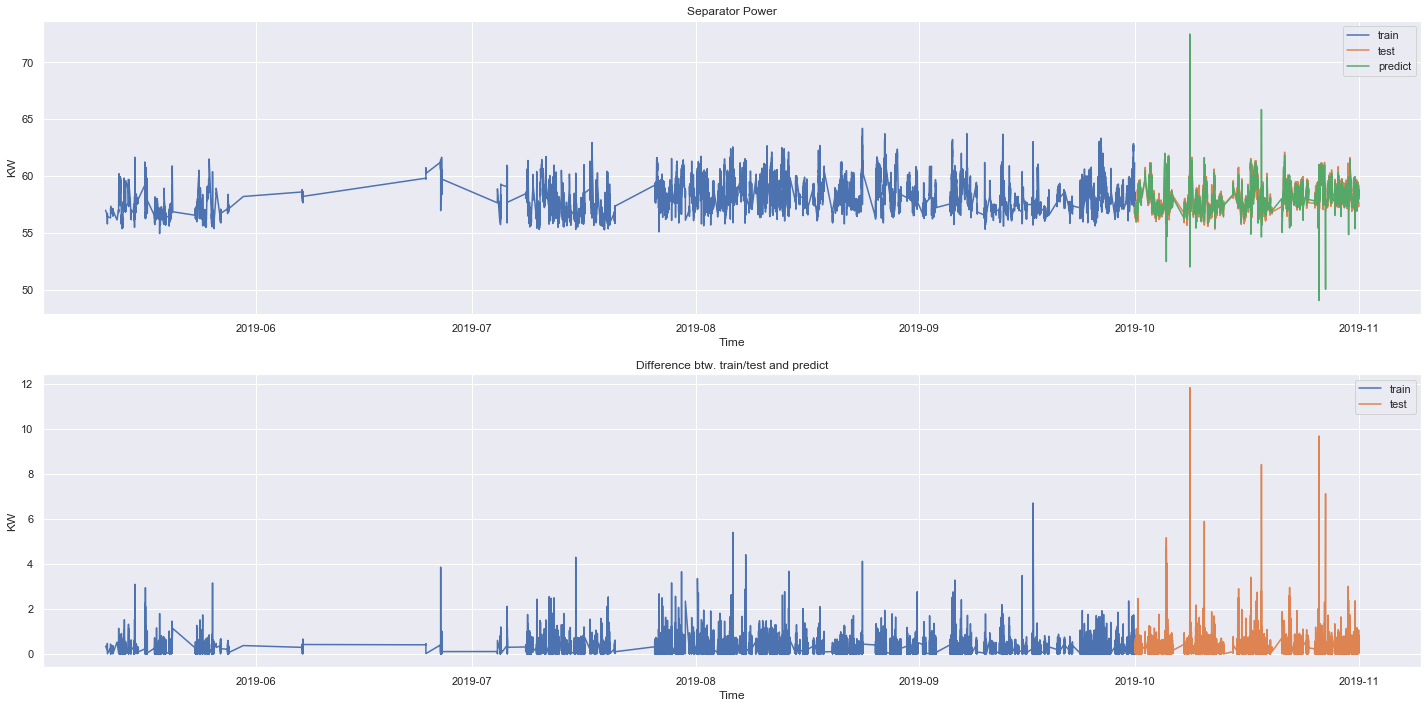

In [74]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index, poly_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(poly_preds_train - y_train), label='train')
ax2.plot(np.abs(poly_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

## XGBooster


In [61]:
# Import Model
from xgboost import XGBRegressor

# Define Model with Grid
XGB_grid = {'n_estimators': [90],
            'learning_rate': [0.1],
            'objective': ['reg:squarederror'],
            'n_jobs':[4]}

XGB = GridSearchCV(XGBRegressor(), XGB_grid, cv=5, n_jobs=-1)
XGB.fit(X_train, y_train)
XGB_preds = XGB.predict(X_test)

XGB_preds_train = XGB.predict(X_train)

# Mean Absolute Error and Mean Squared Error
XGB_mae = mean_absolute_error(XGB_preds, y_test)
XGB_mse = mean_squared_error(XGB_preds, y_test)
print("XGBooster: ", XGB_mae, XGB_mse)

XGB_mae_train = mean_absolute_error(XGB_preds_train, y_train)
XGB_mse_train = mean_squared_error(XGB_preds_train, y_train)
print("XGBooster: ", XGB_mae_train, XGB_mse_train)

XGBooster:  0.23973717745508077 0.10146483376191219
XGBooster:  0.22195317402492534 0.09586844981658481


In [62]:
XGB.best_params_

{'learning_rate': 0.1,
 'n_estimators': 90,
 'n_jobs': 4,
 'objective': 'reg:squarederror'}

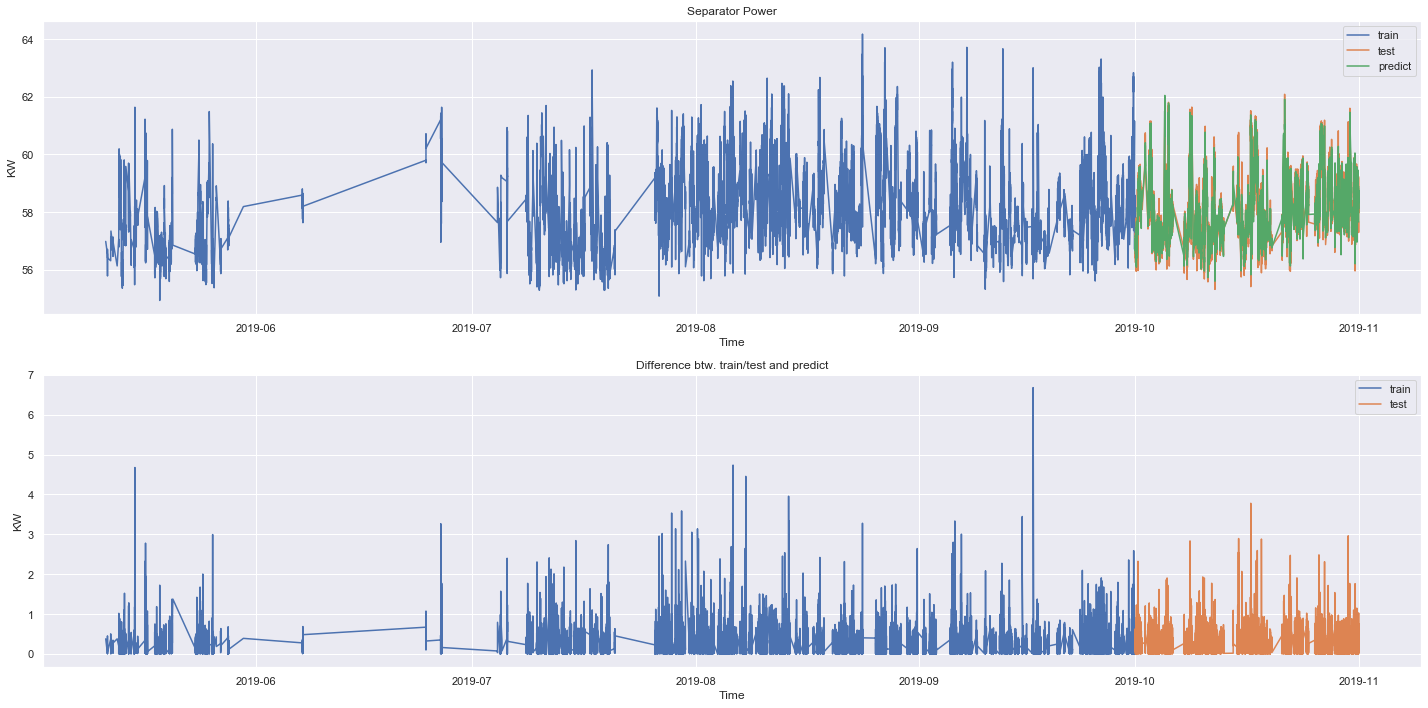

In [63]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index, XGB_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(XGB_preds_train - y_train), label='train')
ax2.plot(np.abs(XGB_preds - y_test), label='test')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

# Gradient Boosting Regressor

In [64]:
# Import Model
from sklearn.ensemble import GradientBoostingRegressor

# Define Model with Grid
GBR_grid = {'n_estimators': [95],
            'learning_rate': [0.05],
            'verbose': [0],
            'warm_start': [False]}

GBR = GridSearchCV(GradientBoostingRegressor(), GBR_grid, cv=2)
GBR.fit(X_train, y_train)
GBR_preds = GBR.predict(X_test)

GBR_preds_train = GBR.predict(X_train)

# Mean Absolute Error and Mean Squared Error
GBR_mae = mean_absolute_error(GBR_preds, y_test)
GBR_mse = mean_squared_error(GBR_preds, y_test)
print("GBR: ", GBR_mae, GBR_mse)

GBR_mae_train = mean_absolute_error(GBR_preds_train, y_train)
GBR_mse_train = mean_squared_error(GBR_preds_train, y_train)
print("GBR: ", GBR_mae_train, GBR_mse_train)

GBR:  0.23860230027571833 0.10040159969088157
GBR:  0.22396125070204473 0.09797020509063299


In [65]:
GBR.best_params_

{'learning_rate': 0.05, 'n_estimators': 95, 'verbose': 0, 'warm_start': False}

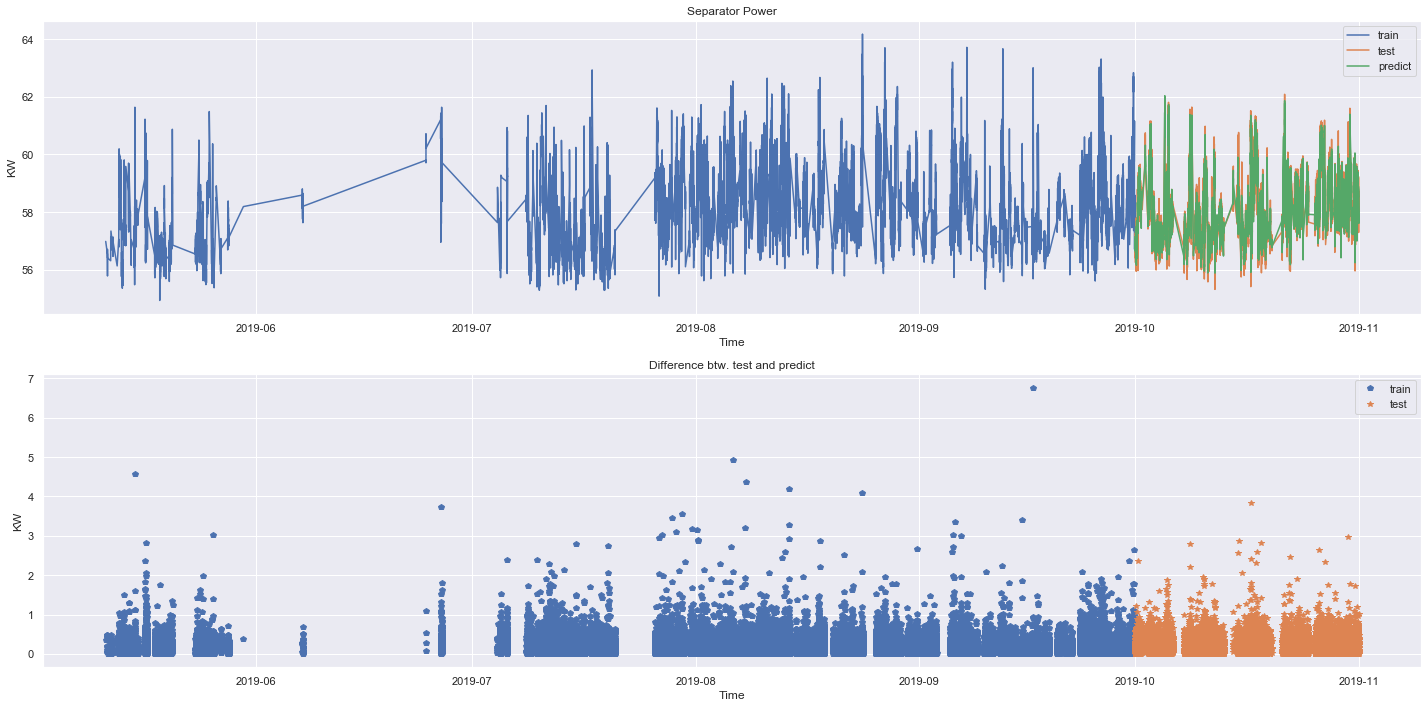

In [66]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['separator_pwr_kw_pv'], label='train')
ax.plot(test_data['separator_pwr_kw_pv'], label='test')
ax.plot(test_data.index[:], GBR_preds, label='predict')
ax.set_title('Separator Power')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(GBR_preds_train - y_train), label='train', marker='p', ls='')
ax2.plot(np.abs(GBR_preds - y_test), label='test', marker='*', ls='')
ax2.set_title('Difference btw. test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('KW')
ax2.legend()

plt.tight_layout()

In [67]:
mae_error=[lr_mae, ls_mae, rd_mae, 'dt_mae', 'rf_mae', knn_mae, brd_mae, poly_mae, XGB_mae, 'svr_mae', GBR_mae]
mse_error=[lr_mse, ls_mse, rd_mse, 'dt_mse', 'rf_mse', knn_mse, brd_mse, poly_mse, XGB_mse, 'svr_mse', GBR_mse]

mae_error_train=[lr_mae_train, ls_mae_train, rd_mae_train, 'dt_mae_train', 'rf_mae_train', knn_mae_train, brd_mae_train, poly_mae_train, XGB_mae_train, 'svr_mae_train', GBR_mae_train]
mse_error_train=[lr_mse_train, ls_mse_train, rd_mse_train, 'dt_mse_train', 'rf_mse_train', knn_mse_train, brd_mse_train, poly_mse_train, XGB_mse_train, 'svr_mse_train', GBR_mse_train]

col = {'Mean Average Error Test':mae_error, 'Mean Average Error Train':mae_error_train, 'Mean Squared Error Test':mse_error, 'Mean Squared Error Train':mse_error_train}
models = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'KNN','Bayesian Ridge', 'Polynomial', 'XGBooster', 'SVR', 'GBR']
df = pd.DataFrame(data=col,index=models)
df

,Mean Average Error Test,Mean Average Error Train,Mean Squared Error Test,Mean Squared Error Train
Linear,0.245803,0.245003,0.104255,0.112598
Lasso,0.245848,0.24502,0.104284,0.112602
Ridge,0.245803,0.245003,0.104255,0.112598
Decision Tree,dt_mae,dt_mae_train,dt_mse,dt_mse_train
Random Forest,rf_mae,rf_mae_train,rf_mse,rf_mse_train
KNN,0.284939,0,0.140775,0
Bayesian Ridge,0.2458,0.245001,0.104254,0.112598
Polynomial,0.251329,0.232581,0.145015,0.0997658
XGBooster,0.239737,0.221953,0.101465,0.0958684
SVR,svr_mae,svr_mae_train,svr_mse,svr_mse_train


# Ensemble Models

In [68]:
# Linear, Lasso, Ridge
ens = pd.DataFrame(data={#'lr_preds': lr_preds,
                         #'poly_preds':poly_preds},
                         'XGB_preds':XGB_preds,
                         'GBR_preds': GBR_preds},
                   index=y_test.index)


In [69]:
ens

,XGB_preds,GBR_preds
date,,
2019-10-01 00:00:00,57.157337,57.146464
2019-10-01 00:01:00,57.183712,57.159387
2019-10-01 00:02:00,57.092232,57.146501
2019-10-01 00:03:00,56.766773,56.803174
2019-10-01 00:04:00,56.854225,56.928146
...,...,...
2019-10-31 23:50:00,58.315895,58.304407
2019-10-31 23:51:00,58.311581,58.317551
2019-10-31 23:52:00,58.319229,58.309967


In [70]:
ens['avg'] = ens.mean(axis=1)

In [71]:
# Mean Absolute Error and Mean Squared Error
ens_mae = mean_absolute_error(ens['avg'], y_test)
ens_mse = mean_squared_error(ens['avg'], y_test)
print("Ensemble Test Errors: ", ens_mae, ens_mse)

# ens_mae_train = mean_absolute_error(ens['avg'], y_train)
# ens_mse_train = mean_squared_error(ens['avg'], y_train)
# print("Ensemble Train Errors: ", ens['avg'], ens['avg'])

Ensemble Test Errors:  0.23871854314808622 0.10055272775549182


# Recursive Strategy

## Linear

In [72]:
X_test.iloc[0]

separator_pwr_kw_pv_1        57.250
separator_pwr_kw_pv_2        57.190
separator_pwr_kw_pv_3        56.880
separator_pwr_kw_pv_4        57.035
separator_pwr_kw_pv_5        57.135
separator_speed_perc_sp_2    42.200
separator_speed_perc_sp_3    42.200
separator_speed_perc_sp_4    42.180
separator_speed_perc_sp_5    42.180
separator_speed_perc_sp_6    42.180
separator_speed_perc_sp_7    42.180
mill_dp_mbar_pv_7            35.600
mill_dp_mbar_pv_8            35.755
mill_dp_mbar_pv_9            35.275
mill_dp_mbar_pv_10           35.090
mill_dp_mbar_pv_11           35.280
mill_dp_mbar_pv_12           35.580
Name: 2019-10-01 00:00:00, dtype: float64

In [73]:
X.drop(['separator_pwr_kw_pv_1'])

KeyError: "['separator_pwr_kw_pv_1'] not found in axis"

In [ ]:
X_test.iloc[0:2]

In [ ]:
# Recursive Strategy only for next minute with Linear
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

X = X_test.iloc[0].copy()
y = y_test.iloc[0].copy()

for i in range(0, 5):
    lr_preds = lin_reg.predict(X.values.reshape(1, -1))
    lr_preds_train = lin_reg.predict(X_train)
    print(i, lr_preds)
#     if i<5:
#         X['KW_%i'%i] = lr_preds[0]
#         X.drop(['separator_pwr_kw_pv_%i'%(5-i)], inplace=True)
#     else:
#         X['KW_%i'%i] = lr_preds[0]
#         X.drop(['KW_%i'%(i-5)], inplace=True)
    X['separator_pwr_kw_pv_5'] = X['separator_pwr_kw_pv_4'].copy()
    X['separator_pwr_kw_pv_4'] = X['separator_pwr_kw_pv_3'].copy()
    X['separator_pwr_kw_pv_3'] = X['separator_pwr_kw_pv_2'].copy()
    X['separator_pwr_kw_pv_2'] = X['separator_pwr_kw_pv_1'].copy()
    X['separator_pwr_kw_pv_1'] = lr_preds

In [ ]:
# # Recursive Strategy for the whole month with Linear
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)    

X = X_test.copy(deep=True)
y = y_test.copy(deep=True)

for i in range(0, 5):
    lr_preds = lin_reg.predict(X)
    lr_mae = mean_absolute_error(lr_preds, y)
    lr_mse = mean_squared_error(lr_preds, y)
    print("Linear: ", lr_mae, lr_mse)
    if i == 0:
#         b = X['separator_pwr_kw_pv_1'].shift(1)
        b = lr_preds.copy()
        X['KW_0'] = b.copy()
        X = X.drop(['separator_pwr_kw_pv_5'], axis=1)
        p_lin = pd.DataFrame(data=lr_preds, index=X.index, columns=['P%i'%i])
        X = X[1:]
        y = y[1:]      
    else:
#         b = X['KW_%i'%(i-1)].shift(1)
        b = lr_preds.copy()
        X['KW_%i'%i] = b.copy()
        X.drop(['separator_pwr_kw_pv_%i'%(5-i)], axis=1, inplace=True)
        dt1 = pd.DataFrame(data=lr_preds, index=X.index, columns=['P%i'%i])
        p_lin = p_lin.join(dt1, sort=True)
        X = X[1:]
        y = y[1:]
#     X['separator_pwr_kw_pv_5'] = X['separator_pwr_kw_pv_4'].copy()
#     X['separator_pwr_kw_pv_4'] = X['separator_pwr_kw_pv_3'].copy()
#     X['separator_pwr_kw_pv_3'] = X['separator_pwr_kw_pv_2'].copy()
#     X['separator_pwr_kw_pv_2'] = X['separator_pwr_kw_pv_1'].copy()
#     X['separator_pwr_kw_pv_1'] = lr_preds

In [ ]:
p_lin

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
p_lin2 = p_lin.copy()
p_lin2['target'] = y_test.values
p_lin2['2019-10-01 00:00:00':'2019-10-01 00:20:00'].plot(legend=None)
# plt.title('Prediction 5mins later with Linear Regression', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('KW', size=20)
plt.tick_params(labelsize=25)
plt.ylim(49, 58)
plt.legend(loc = 'lower right', fontsize='xx-large')
plt.tight_layout()
plt.savefig('rec_Lin_task1.png')

## GBR

In [ ]:
# # Recursive Strategy for the whole month with GBR
from sklearn.ensemble import GradientBoostingRegressor

# # Define Model with Grid
# GBR_grid = {'n_estimators': [130],
#             'learning_rate': [0.05],
#             'verbose': [0],
#             'warm_start': [False]}

# GBR = GridSearchCV(GradientBoostingRegressor(), GBR_grid, cv=2)
# GBR.fit(X_train, y_train)
GBR_preds_train = GBR.predict(X_train)

X = X_test.copy(deep=True)
y = y_test.copy(deep=True)

for i in range(0, 5):
    GBR_preds = GBR.predict(X)
    GBR_mae = mean_absolute_error(GBR_preds, y)
    GBR_mse = mean_squared_error(GBR_preds, y)
    print("GBR: ", GBR_mae, GBR_mse)
    if i == 0:
#         b = X['separator_pwr_kw_pv_1'].shift(1)
        b = GBR_preds
        X['MB_0'] = b
        X = X.drop(['separator_pwr_kw_pv_5'], axis=1)
        preds = pd.DataFrame(data=GBR_preds, index=X.index, columns=['t = %i min'%(i+1)])
        X = X[1:]
        y = y[1:]      
    else:
#         b = X['MB_%i'%(i-1)].shift(1)
        b = GBR_preds.copy()
        X['MB_%i'%i] = b.copy()
        X.drop(['separator_pwr_kw_pv_%i'%(5-i)], axis=1, inplace=True)
        dt1 = pd.DataFrame(data=GBR_preds, index=X.index, columns=['t = %i min'%(i+1)])
        preds = preds.join(dt1, sort=True)
        X = X[1:]
        y = y[1:]

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
preds2 = preds.copy()
preds2['target'] = y_test.values
preds2['2019-10-01 00:00:00':'2019-10-01 00:20:00'].plot(legend=None)
# plt.title('Prediction 5mins later with Gradient Booster Regressor', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('KW', size=20)
plt.tick_params(labelsize=25)
plt.ylim(49, 58)
plt.legend(loc = 'down right', fontsize='xx-large')
plt.tight_layout()
plt.savefig('rec_GBR_task1.png')


In [ ]:
# Mean Absolute Error and Mean Squared Error
GBR_mae = mean_absolute_error(GBR_preds, y_test)
GBR_mse = mean_squared_error(GBR_preds, y_test)
print("GBR: ", GBR_mae, GBR_mse)

GBR_mae_train = mean_absolute_error(GBR_preds_train, y_train)
GBR_mse_train = mean_squared_error(GBR_preds_train, y_train)
print("GBR: ", GBR_mae_train, GBR_mse_train)